In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors


from astropy.io import ascii

data = ascii.read(r'C:\Users\Jay\augerdata.dat', "rb")
data


YYYY,DDD,Theta,E,RA,dec,Glon,Glat
int32,int32,float64,float64,float64,float64,float64,float64
2004,125,47.7,62.2,267.2,-11.4,15.5,8.4
2004,142,59.2,84.7,199.7,-34.9,-50.8,27.7
2004,177,71.5,54.6,12.7,-56.6,-56.9,-60.5
2004,239,58.3,54.0,32.7,-85.0,-59.1,-31.8
2004,282,26.3,58.6,208.1,-60.1,-49.5,1.9
2004,339,44.6,78.2,268.4,-61.0,-27.6,-16.9
2004,343,23.3,58.2,224.7,-44.0,-34.1,13.1
2005,50,67.5,60.2,29.0,-14.0,174.9,-70.0
2005,54,34.9,71.2,17.5,-37.8,-76.0,-78.6


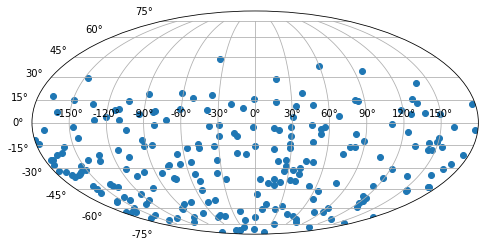

In [3]:
import astropy.coordinates as coord
import astropy.units as u

ra = coord.Angle(data['RA']*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(data['dec']*u.degree) 

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.radian, dec.radian)
ax.grid(True)

In [3]:
data.colnames


['YYYY', 'DDD', 'Theta', 'E', 'RA', 'dec', 'Glon', 'Glat']

Here, I have a chart of data giving the details of cosmic ray air showers coming from a source, more specifically an AGN.
Note that there is a gap in the chart, for some reason there are a lot of masked rows here. The entire data set is on the poster. What I plan to do here is to take 50 events,( E > 55 EeV) and plot them on a skymap first. 

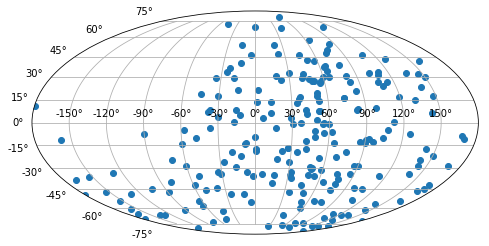

In [4]:
Glon= coord.Angle(data['Glon']*u.degree*-1)
ra = ra.wrap_at(180*u.degree)
Glat = coord.Angle(data['Glat']*u.degree) 

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(Glon.radian, Glat.radian)
ax.grid(True)

Next, I want to implement an angular separation formula to calculate the angular distance between each pair on the skymap. This is done by using the right ascension and declination data, which each correspond to a point on the skymap.
*See equation below. 

 
\begin{align*}
\theta = \cos^{-1}[\sin(\delta_{1})\sin(\delta_{2})+\cos(\delta_{1})\cos(\delta_{2})\cos(\alpha_{1}-\alpha_{2})]
\end{align*}


Here, RA( Right-Ascension) is equal to alpha while the declination is equal to delta in data.



In [6]:

def AngulaSep(ra1, dec1, ra2, dec2):
    ra1 = ra1*np.pi/180.
    ra2 = ra2*np.pi/180.
    dec1 = dec1*np.pi/180.
    dec2 = dec2*np.pi/180. 
    Theta = np.arccos(np.sin(dec1)*np.sin(dec2)+np.cos(dec1)*np.cos(dec2)*np.cos(ra1-ra2))
    return Theta*180./np.pi

# Test cases
Theta = AngulaSep(45,90 ,243,45) # 45 degree separation

print(Theta)
    

45.0


In [7]:
# Check that we can read rows from the data file

# All RA values
#print(data['RA'])

# Just one RA value
print(data[23]['RA'])
   

299.0


In [7]:
# Print all right ascensions and declinations
#for event in data:
    #print(event['RA'], event['dec'])

In [9]:
angles=[]
for i in range(0, len(data)-1):
    for  j in range(i+1, len(data)):
        theta=AngulaSep(data[i]['RA'],data[i]['dec'],data[j]['RA'],data[j]['dec'])
        #print(data[i]['RA'],data[i]['dec'],data[j]['RA'],data[j]['dec'])
        #print(theta)
        angles.append(theta)
        


Now, I want a nice distribution of the angular separations.

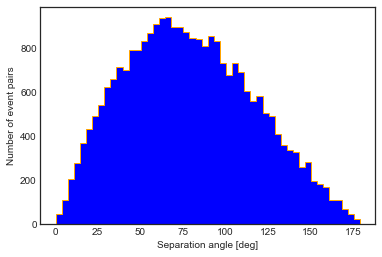

In [10]:
plt.style.use('seaborn-white')
plt.hist(angles, bins=50, histtype='stepfilled', color='blue',
        edgecolor='orange');
plt.xlabel('')
plt.ylabel('Number of event pairs')
plt.xlabel('Separation angle [deg]')
plt.show()

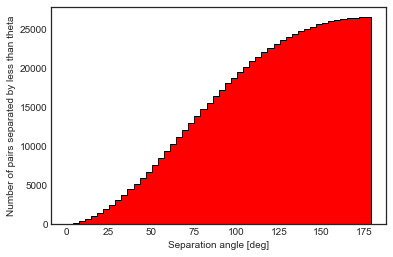

In [11]:
plt.style.use('seaborn-white')
plt.hist(angles, bins=50, histtype='stepfilled', color='red', cumulative=True,
        edgecolor='black');
plt.legend
plt.xlabel('Separation angle [deg]')
plt.ylabel('Number of pairs separated by less than theta')
plt.show()

C:\Users\Jay\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


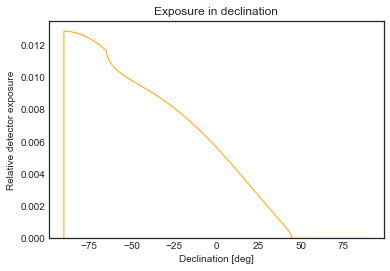

In [12]:
# Relative exposure plot
nbins = 100000
a0 = -35.21
thetam = 80
radConv = np.pi / 180.
decs = []
exposures = []
for dec in np.linspace(-90,90,nbins):
    eta = (np.cos(thetam*radConv) - np.sin(a0*radConv)*np.sin(dec*radConv)) / (np.cos(a0*radConv)*np.cos(dec*radConv))
    if eta > 1:
        alpham = 0
    elif eta < -1:
        alpham = np.pi
    else:
        alpham = np.arccos(eta)
    omega = (np.cos(a0*radConv)*np.cos(dec*radConv)*np.sin(alpham) + alpham*np.sin(a0*radConv)*np.sin(dec*radConv))
    decs.append(dec)
    exposures.append(omega)
    
plt.style.use('seaborn-white')
plt.hist(decs, bins=nbins, weights=exposures, histtype='step', normed=True,
        edgecolor='orange');
plt.legend
plt.xlabel('Declination [deg]')
plt.ylabel('Relative detector exposure')
plt.title('Exposure in declination')
plt.show()
    

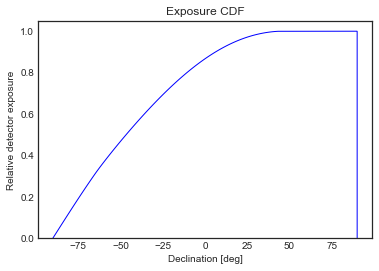

In [13]:
plt.style.use('seaborn-white')
plt.hist(decs, bins=nbins, weights=exposures, histtype='step', density=True, cumulative=True,
        edgecolor='blue');
plt.legend
plt.xlabel('Declination [deg]')
plt.ylabel('Relative detector exposure')
plt.title('Exposure CDF')
plt.show()

Here, I now want to make a simulation were I generate random isotropic directions. I do this by first calculating the two above exposure plots and then choosing a random x value, or declination from the chart as my random number here. I want to generate random number from the probability distribution here. 

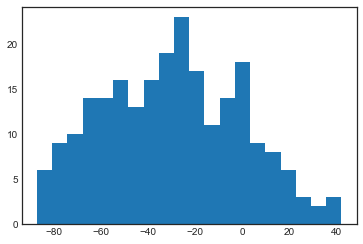

In [14]:
# Sampling declinations from the exposure function, taking solid angle into account
bins = decs[:]
bins.append(90.)
#print(bins)

# Account for solid angle in sampling (cosine of declination)
samplingFunc = [exposures[i]*np.cos(decs[i]*radConv) for i in range(len(exposures))]

bin_midpoints = bins[:-1] + np.diff(bins)/2
cdf = np.cumsum(samplingFunc)  #adding up all of the sums
cdf = cdf / cdf[-1] #normaliation
values = np.random.rand(len(data))
value_bins = np.searchsorted(cdf, values)
random_decs = bin_midpoints[value_bins]

#plt.subplot(121)
#plt.hist(decs, bins=nbins, weights=exposures)
#plt.subplot(122)
plt.hist(random_decs, 20)
plt.show()

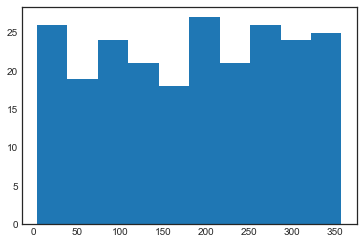

In [15]:
# Sampling random right ascensions from a uniform distribution
random_ras = np.random.rand(len(data))*360.  
    
plt.hist(random_ras)
plt.show()

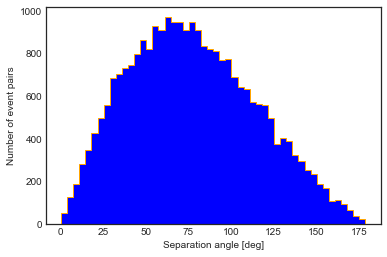

In [16]:
# Generating a single Monte Carlo dataset
MCangles=[]
for i in range(0, len(random_decs)-1):
    for  j in range(i+1, len(random_decs)):
        theta=AngulaSep(random_ras[i],random_decs[i],random_ras[j],random_decs[j])
        MCangles.append(theta)
        
plt.style.use('seaborn-white')
plt.hist(MCangles, bins=50, histtype='stepfilled', color='blue',
        edgecolor='orange');
plt.xlabel('')
plt.ylabel('Number of event pairs')
plt.xlabel('Separation angle [deg]')
plt.show()



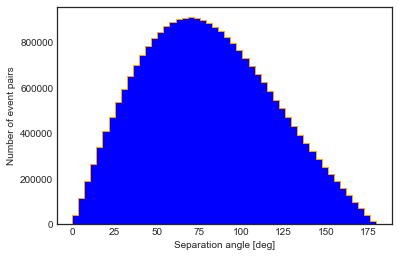

In [17]:
# Calculate the separation histogram for 1,000 samples of len(data) events
# 1000 Monte Carlo realisations to get average separation histogram for isotropic events
nRealisations = 1000
avMCangles = []
MCsamples = []
for n in range(nRealisations):
    # Init. a new MC sample
    sample = []
    # Get len(data) random declinations
    vals = np.random.rand(len(data))
    val_bins = np.searchsorted(cdf, vals)
    rand_decs = bin_midpoints[val_bins]
    # Get len(data) random right ascensions
    rand_ras = np.random.rand(len(data))*360
    # Calculate the separation angles
    for i in range(0, len(rand_decs)-1):
        for  j in range(i+1, len(rand_decs)):
            theta=AngulaSep(rand_ras[i],rand_decs[i],rand_ras[j],rand_decs[j])
            avMCangles.append(theta)
            sample.append(theta)
    MCsamples.append(sample)
    
plt.style.use('seaborn-white')
plt.hist(avMCangles, bins=50, histtype='stepfilled', color='blue',
        edgecolor='orange');
plt.xlabel('')
plt.ylabel('Number of event pairs')
plt.xlabel('Separation angle [deg]')
plt.show()

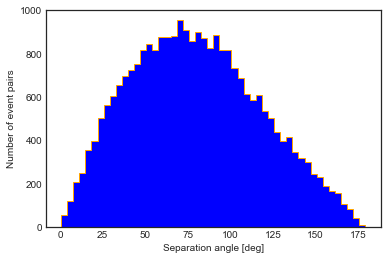

In [18]:
# Individual MC samples (we have 1000 sets of len(data) events)
plt.style.use('seaborn-white')
plt.hist(MCsamples[516], bins=50, histtype='stepfilled', color='blue',
        edgecolor='orange');
plt.xlabel('')
plt.ylabel('Number of event pairs')
plt.xlabel('Separation angle [deg]')
plt.show()

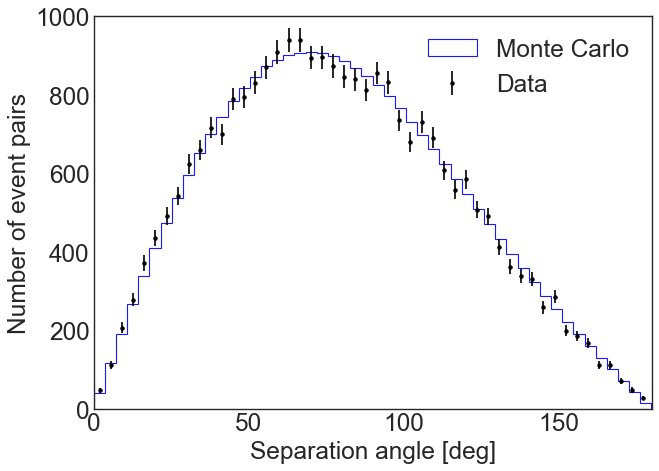

In [19]:
plt.rcParams.update({'font.size': 22})
fig=plt.figure(figsize=(9, 6.5), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.gca()
ax.set_autoscale_on(False)

plt.style.use('seaborn-white')

plt.hist(avMCangles, bins=50, histtype='step', color='blue', alpha=0.9, weights=np.ones_like(avMCangles)/nRealisations,
        edgecolor='blue', label='Monte Carlo');
ax.axis([0,180,0,1000])

counts,bin_edges = np.histogram(angles,50)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
err = [np.sqrt(val) for val in counts]
plt.errorbar(bin_centres, counts, yerr=err, fmt='.',color='black',label='Data')

#plt.hist(angles, bins=50, histtype='stepfilled', color='red', alpha=0.5,
#        edgecolor='red', label='Data');
plt.xlabel('')
plt.ylabel('Number of event pairs')
plt.xlabel('Separation angle [deg]')
plt.legend()
plt.show()
fig.savefig('sep.pdf')

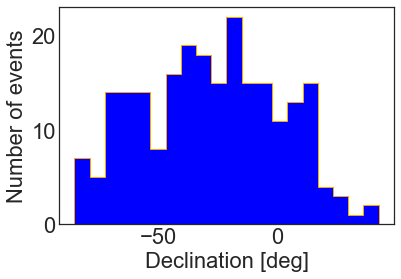

In [20]:
plt.style.use('seaborn-white')
plt.hist(data['dec'], bins=20, histtype='stepfilled', color='blue',
        edgecolor='orange');
plt.xlabel('')
plt.ylabel('Number of events')
plt.xlabel('Declination [deg]')
plt.show()

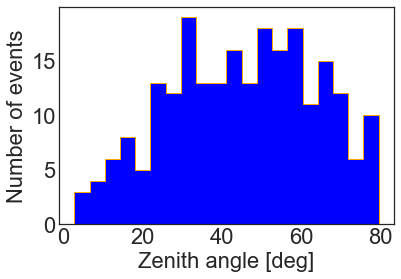

In [21]:
plt.style.use('seaborn-white')
plt.hist(data['Theta'], bins=20, histtype='stepfilled', color='blue',
        edgecolor='orange');
plt.xlabel('')
plt.ylabel('Number of events')
plt.xlabel('Zenith angle [deg]')
plt.show()

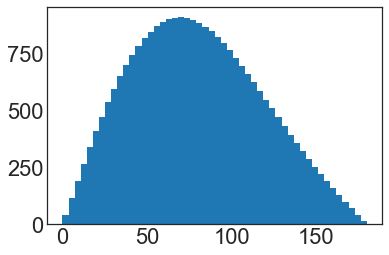

In [22]:
# Import package for Poisson distribution
import scipy.stats.distributions as dists

# Get the MC histogram bin counts
MCHist = plt.hist(avMCangles,bins=50,weights=np.ones_like(avMCangles)/nRealisations)

def CalculateLL(data, MCHist, nBins):
    nBins = 50
    # Create the histograms for comparison
    dataHist = plt.hist(data,bins=nBins)
    plt.close()
    # Calculate the log-likelihood
    LL = 0
    for i in range(nBins):
        LL += np.log( dists.poisson.pmf(dataHist[0][i], MCHist[0][i]) )
    return -2. * LL

In [23]:
# Test the LL function
dataLL = CalculateLL(angles, MCHist, 50)

In [24]:
# Generate the log-likelihood distribution for our len(data) Monte Carlo samples
MC_loglikes = []
for n in range(nRealisations):
    LL = CalculateLL(MCsamples[n], MCHist, 50)
    MC_loglikes.append(LL)

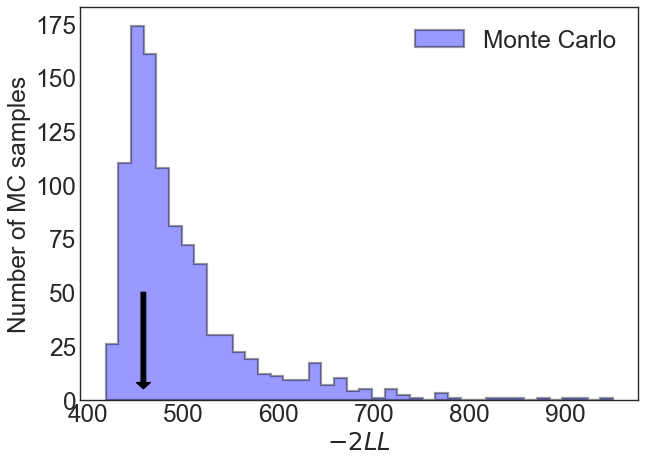

In [25]:
fig=plt.figure(figsize=(9, 6.5), dpi= 80, facecolor='w', edgecolor='k')
plt.style.use('seaborn-white')
plt.hist(MC_loglikes, bins=40, histtype='stepfilled', color='blue', alpha = 0.4, linewidth=2,
        edgecolor='black',label = 'Monte Carlo');
plt.arrow(dataLL, 50, 0, -45, width=5, length_includes_head = True, color='black', head_length = 3, overhang = 0, label='Data')
plt.xlabel('')
plt.ylabel('Number of MC samples')
plt.xlabel(r'$-2 LL$')
plt.legend()
plt.show()
fig.savefig('LL.pdf')